In [2]:
using PyCall
using DataFrames

function get_root_dataframe(file_path::String, tree_name::String, branches::Vector{String})
    pyimport_conda("ROOT", "root")
    file = pyimport("ROOT").TFile.Open(file_path)
    ROOT = pyimport("ROOT")
    dfRoot = ROOT.RDataFrame(tree_name, file_path)
    # Convert RDataFrame to pandas DataFrame
    pandas = pyimport("pandas")
    df = dfRoot.AsNumpy(branches)
    # Convert the pandas DataFrame to a Julia DataFrame
    df = DataFrame(df)

    return df
end

file_path = "KKpi_mcThrown.root"
tree_name = "pipkmks_flat_Thrown"
branches = ["nParticles", "nThrown", "beam_px", "beam_py", "beam_pz", "beam_E", 
            "target_px", "target_py", "target_pz", "target_E", 
            "pip1_px", "pip1_py", "pip1_pz", "pip1_E", 
            "pip2_px", "pip2_py", "pip2_pz", "pip2_E", 
            "pim_px", "pim_py", "pim_pz", "pim_E", 
            "km_px", "km_py", "km_pz", "km_E", 
            "proton_px", "proton_py", "proton_pz", "proton_E", 
            "ks_px", "ks_py", "ks_pz", "ks_E", 
            "theta_p", "mom_p", "phi_p", 
            "theta_km", "mom_km", "phi_km", 
            "theta_pip1", "mom_pip1", "phi_pip1", 
            "theta_pip2", "mom_pip2", "phi_pip2", 
            "theta_pim", "mom_pim", "phi_pim", 
            "theta_f1", "mom_f1", "phi_f1", 
            "mass_f1", "mpippim", "mppip1", "mKsKm", 
            "men_s", "men_t", "cosTheta_f1_cm", "phi_f1_cm", 
            "cosTheta_Ks_cm", "phi_Ks_cm"]

# Call the function and get the DataFrame
dfKKpi = get_root_dataframe(file_path, tree_name, branches)

# Print the first 10 rows of the DataFrame
println(first(dfKKpi, 10))


10×62 DataFrame
 Row │ beam_E   beam_px  beam_py  beam_pz  cosTheta_Ks_cm  cosTheta_f1_cm  km_E      km_px      km_py      km_pz     ks_E     ks_px    ks_py    ks_pz    mKsKm     mass_f1   men_s    men_t      mom_f1   mom_km    mom_p    mom_pim   mom_pip1  mom_pip2  mpippim   mppip1   nParticles  nThrown  phi_Ks_cm  phi_f1   phi_f1_cm  phi_km      phi_p    phi_pim    phi_pip1   phi_pip2   pim_E     pim_px     pim_py     pim_pz     pip1_E    pip1_px    pip1_py    pip1_pz   pip2_E    pip2_px    pip2_py    pip2_pz   proton_E  proton_px  proton_py  proton_pz  target_E  target_px  target_py  target_pz  theta_f1  theta_km  theta_p  theta_pim  theta_pip1  theta_pip2 
     │ Float64  Float64  Float64  Float64  Float64         Float64         Float64   Float64    Float64    Float64   Float64  Float64  Float64  Float64  Float64   Float64   Float64  Float64    Float64  Float64   Float64  Float64   Float64   Float64   Float64   Float64  Int32       Int32    Float64    Float64  Float64    Float64  

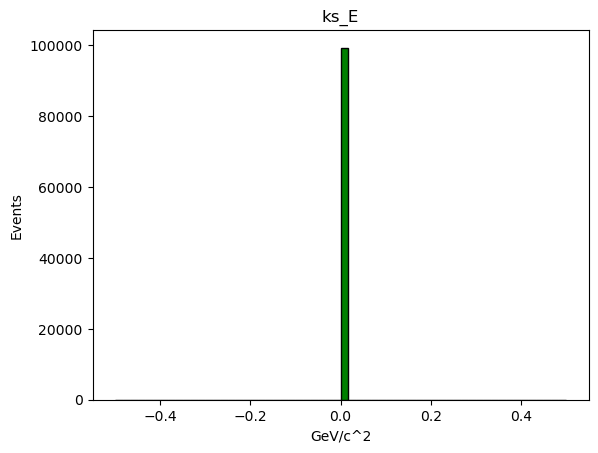

In [3]:
using PyPlot
using Statistics

function plotting(df::DataFrame, column::String; bins::Int=50, range::Union{Nothing, Tuple{Float64, Float64}}=nothing)
    # Extract the data from the specified column(s)
    data = df[:, column]

    clf() # Clear the current figure
    hist(data, bins=bins, edgecolor="black", range=range, color="green")
    title(column)
    xlabel("GeV/c^2")
    ylabel("Events")
    gcf()  # Get the current figure to ensure it's printed
end

plotting(dfKKpi, "ks_E", bins=60)
